In [91]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importing iris (a toy dataset from sklearn) for classification
from sklearn import datasets
iris = datasets.load_iris()


# getting familiar with data, names, format etc.
print(iris.target_names)
# target names in order are setosa, versicolor, virginica

print(iris.feature_names)
# features in order are sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

# print(iris.data[0:10])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [92]:
# creating dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [93]:
# training and test data
X_train, X_test, y_train, y_test = train_test_split(data[iris.feature_names], data['species'], test_size = 0.3, stratify = iris.target, random_state=123456)

[Text(167.40000000000003, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(133.92000000000002, 126.83999999999999, 'X[0] <= 7.1\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(100.44000000000001, 90.6, 'X[1] <= 2.25\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(66.96000000000001, 54.359999999999985, 'X[2] <= 4.25\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(167.40000000000003, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.8400000000

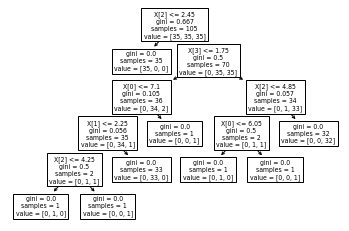

In [94]:
clf = DecisionTreeClassifier()
clf_trained = clf.fit(X_train, y_train)
tree.plot_tree(clf_trained)

In [95]:
# using a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=123456)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123456)

In [96]:
# finding accuracy
prediction = clf.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy score (method 1): {accuracy}')


# Can also use the score function to see accuracy
score = clf.score(X_test, y_test)
print(f'Accuracy score (method 2): {score}')

Accuracy score (method 1): 0.9333333333333333
Accuracy score (method 2): 0.9333333333333333


In [97]:
#looking at the importance of each feature
importance = pd.Series(clf.feature_importances_, index=iris.feature_names)
importance.sort_values(ascending=False)
importance

sepal length (cm)    0.082363
sepal width (cm)     0.032630
petal length (cm)    0.441136
petal width (cm)     0.443871
dtype: float64

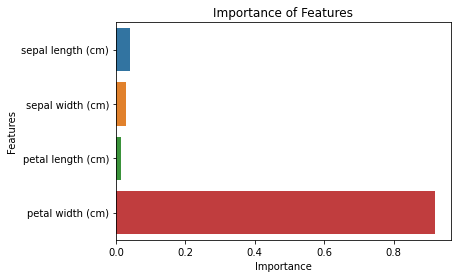

In [90]:
# playing around with matplotlib - plotting a bar graph
%matplotlib inline
sns.barplot(x=importance, y=importance.index)
plt.title('Importance of Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

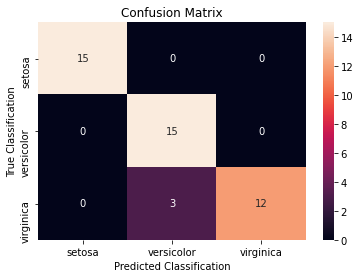

In [100]:
# making a confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, prediction), columns=iris.target_names, index=iris.target_names)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted Classification')
ax.set_ylabel('True Classification')
ax.set_title('Confusion Matrix')
